In [1]:
from utils.dataloader import DatasetLoader 
from utils.plot import plt_corr,plot_index

from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split , cross_val_score
import xgboost as xgb

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_path = "dataset/"
loader = DatasetLoader(dataset_path)

datasets = loader.load_all_pickle_dataset()
dataset_dict = loader.get_state_names(datasets[0])
print(dataset_dict)

blacklist_states = ['kansas', 'new mexico', 'california', 'arizona']

for idx in range(len(blacklist_states)):
    del dataset_dict[blacklist_states[idx]]

{'alabama': ['baldwin', 'calhoun', 'cherokee', 'coffee', 'covington', 'dale', 'dallas', 'elmore', 'escambia', 'geneva', 'henry', 'houston', 'lauderdale', 'lawrence', 'limestone', 'madison', 'mobile', 'monroe', 'shelby'], 'arizona': ['graham', 'maricopa', 'pinal', 'yuma'], 'arkansas': ['ashley', 'chicot', 'clay', 'craighead', 'crittenden', 'desha', 'drew', 'jefferson', 'lee', 'lincoln', 'mississippi', 'phillips', 'poinsett'], 'california': ['kings', 'merced', 'tulare'], 'georgia': ['appling', 'atkinson', 'baker', 'ben hill', 'berrien', 'bleckley', 'brooks', 'bulloch', 'burke', 'calhoun', 'candler', 'coffee', 'colquitt', 'cook', 'crisp', 'decatur', 'dodge', 'dooly', 'early', 'emanuel', 'grady', 'irwin', 'jeff davis', 'jefferson', 'jenkins', 'laurens', 'miller', 'mitchell', 'pierce', 'pulaski', 'randolph', 'screven', 'seminole', 'sumter', 'tattnall', 'terrell', 'thomas', 'tift', 'turner', 'webster', 'wilcox', 'worth'], 'kansas': ['pratt', 'sumner'], 'louisiana': ['catahoula', 'east carrol

In [3]:
full_df = loader.combine_datasets(datasets,dataset_dict,total_dataset_number=5)

In [14]:
full_df

,Date,evi,lai,fpar,lst_day,lst_nigth,dayl,prcp,srad,tmax,...,Clay,Bulk density,Coarse fragments,Total Nitrogen,pH,CEC,SOC,OCD,OCS,yield
0,04-15,0.310849,11.546470,45.162013,15083.440266,14397.592538,45896.016658,0.319848,427.239497,27.437770,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
1,05-15,0.328404,12.507246,44.811690,15171.300404,14576.705072,48760.840971,4.875159,387.576621,29.670406,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
2,06-15,0.186835,12.136800,44.564538,15101.516064,14620.126352,50272.138924,11.172403,310.082462,29.770382,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
3,07-15,0.337602,11.587949,40.694987,15105.019305,14636.127627,49658.408145,7.419759,328.322165,31.307629,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
4,08-15,0.429020,23.179714,66.186181,15012.753248,14827.422734,47196.632539,8.091435,349.853724,33.159170,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,05-15,0.147366,3.009667,16.458302,15785.532374,14406.485629,49448.332171,0.000000,511.273044,32.359206,...,145.947609,185.418075,109.261333,77.933179,556.218997,56.119027,33.153465,92.948824,21.344069,410.0
2,06-15,0.138030,2.773413,15.413657,15917.574843,14614.328619,51060.650087,0.759882,497.074180,33.964788,...,145.947609,185.418075,109.261333,77.933179,556.218997,56.119027,33.153465,92.948824,21.344069,410.0
3,07-15,0.158512,3.184097,17.261705,16086.444367,14851.301994,50300.061961,0.000000,507.819244,39.806442,...,145.947609,185.418075,109.261333,77.933179,556.218997,56.119027,33.153465,92.948824,21.344069,410.0
4,08-15,0.155171,4.577355,24.006862,15970.488128,14730.365684,47515.327461,0.441983,474.409474,36.650876,...,145.947609,185.418075,109.261333,77.933179,556.218997,56.119027,33.153465,92.948824,21.344069,410.0


In [19]:
full_df = full_df.reset_index(drop=True)


In [20]:
full_df


,Date,evi,lai,fpar,lst_day,lst_nigth,dayl,prcp,srad,tmax,...,Clay,Bulk density,Coarse fragments,Total Nitrogen,pH,CEC,SOC,OCD,OCS,yield
0,04-15,0.310849,11.546470,45.162013,15083.440266,14397.592538,45896.016658,0.319848,427.239497,27.437770,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
1,05-15,0.328404,12.507246,44.811690,15171.300404,14576.705072,48760.840971,4.875159,387.576621,29.670406,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
2,06-15,0.186835,12.136800,44.564538,15101.516064,14620.126352,50272.138924,11.172403,310.082462,29.770382,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
3,07-15,0.337602,11.587949,40.694987,15105.019305,14636.127627,49658.408145,7.419759,328.322165,31.307629,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
4,08-15,0.429020,23.179714,66.186181,15012.753248,14827.422734,47196.632539,8.091435,349.853724,33.159170,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,05-15,0.147366,3.009667,16.458302,15785.532374,14406.485629,49448.332171,0.000000,511.273044,32.359206,...,145.947609,185.418075,109.261333,77.933179,556.218997,56.119027,33.153465,92.948824,21.344069,410.0
6596,06-15,0.138030,2.773413,15.413657,15917.574843,14614.328619,51060.650087,0.759882,497.074180,33.964788,...,145.947609,185.418075,109.261333,77.933179,556.218997,56.119027,33.153465,92.948824,21.344069,410.0
6597,07-15,0.158512,3.184097,17.261705,16086.444367,14851.301994,50300.061961,0.000000,507.819244,39.806442,...,145.947609,185.418075,109.261333,77.933179,556.218997,56.119027,33.153465,92.948824,21.344069,410.0
6598,08-15,0.155171,4.577355,24.006862,15970.488128,14730.365684,47515.327461,0.441983,474.409474,36.650876,...,145.947609,185.418075,109.261333,77.933179,556.218997,56.119027,33.153465,92.948824,21.344069,410.0


In [29]:
full_df['Date'] = pd.to_datetime(full_df['Date'], format = '%m-%d')


In [30]:
full_df.dtypes

Date                datetime64[ns]
evi                        float64
lai                        float64
fpar                       float64
lst_day                    float64
lst_nigth                  float64
dayl                       float64
prcp                       float64
srad                       float64
tmax                       float64
tmin                       float64
vp                         float64
ssm                        float64
susm                       float64
Sand                       float64
Silt                       float64
Clay                       float64
Bulk density               float64
Coarse fragments           float64
Total Nitrogen             float64
pH                         float64
CEC                        float64
SOC                        float64
OCD                        float64
OCS                        float64
yield                      float64
dtype: object

In [31]:
full_df

,Date,evi,lai,fpar,lst_day,lst_nigth,dayl,prcp,srad,tmax,...,Clay,Bulk density,Coarse fragments,Total Nitrogen,pH,CEC,SOC,OCD,OCS,yield
0,1900-04-15,0.310849,11.546470,45.162013,15083.440266,14397.592538,45896.016658,0.319848,427.239497,27.437770,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
1,1900-05-15,0.328404,12.507246,44.811690,15171.300404,14576.705072,48760.840971,4.875159,387.576621,29.670406,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
2,1900-06-15,0.186835,12.136800,44.564538,15101.516064,14620.126352,50272.138924,11.172403,310.082462,29.770382,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
3,1900-07-15,0.337602,11.587949,40.694987,15105.019305,14636.127627,49658.408145,7.419759,328.322165,31.307629,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
4,1900-08-15,0.429020,23.179714,66.186181,15012.753248,14827.422734,47196.632539,8.091435,349.853724,33.159170,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,1900-05-15,0.147366,3.009667,16.458302,15785.532374,14406.485629,49448.332171,0.000000,511.273044,32.359206,...,145.947609,185.418075,109.261333,77.933179,556.218997,56.119027,33.153465,92.948824,21.344069,410.0
6596,1900-06-15,0.138030,2.773413,15.413657,15917.574843,14614.328619,51060.650087,0.759882,497.074180,33.964788,...,145.947609,185.418075,109.261333,77.933179,556.218997,56.119027,33.153465,92.948824,21.344069,410.0
6597,1900-07-15,0.158512,3.184097,17.261705,16086.444367,14851.301994,50300.061961,0.000000,507.819244,39.806442,...,145.947609,185.418075,109.261333,77.933179,556.218997,56.119027,33.153465,92.948824,21.344069,410.0
6598,1900-08-15,0.155171,4.577355,24.006862,15970.488128,14730.365684,47515.327461,0.441983,474.409474,36.650876,...,145.947609,185.418075,109.261333,77.933179,556.218997,56.119027,33.153465,92.948824,21.344069,410.0


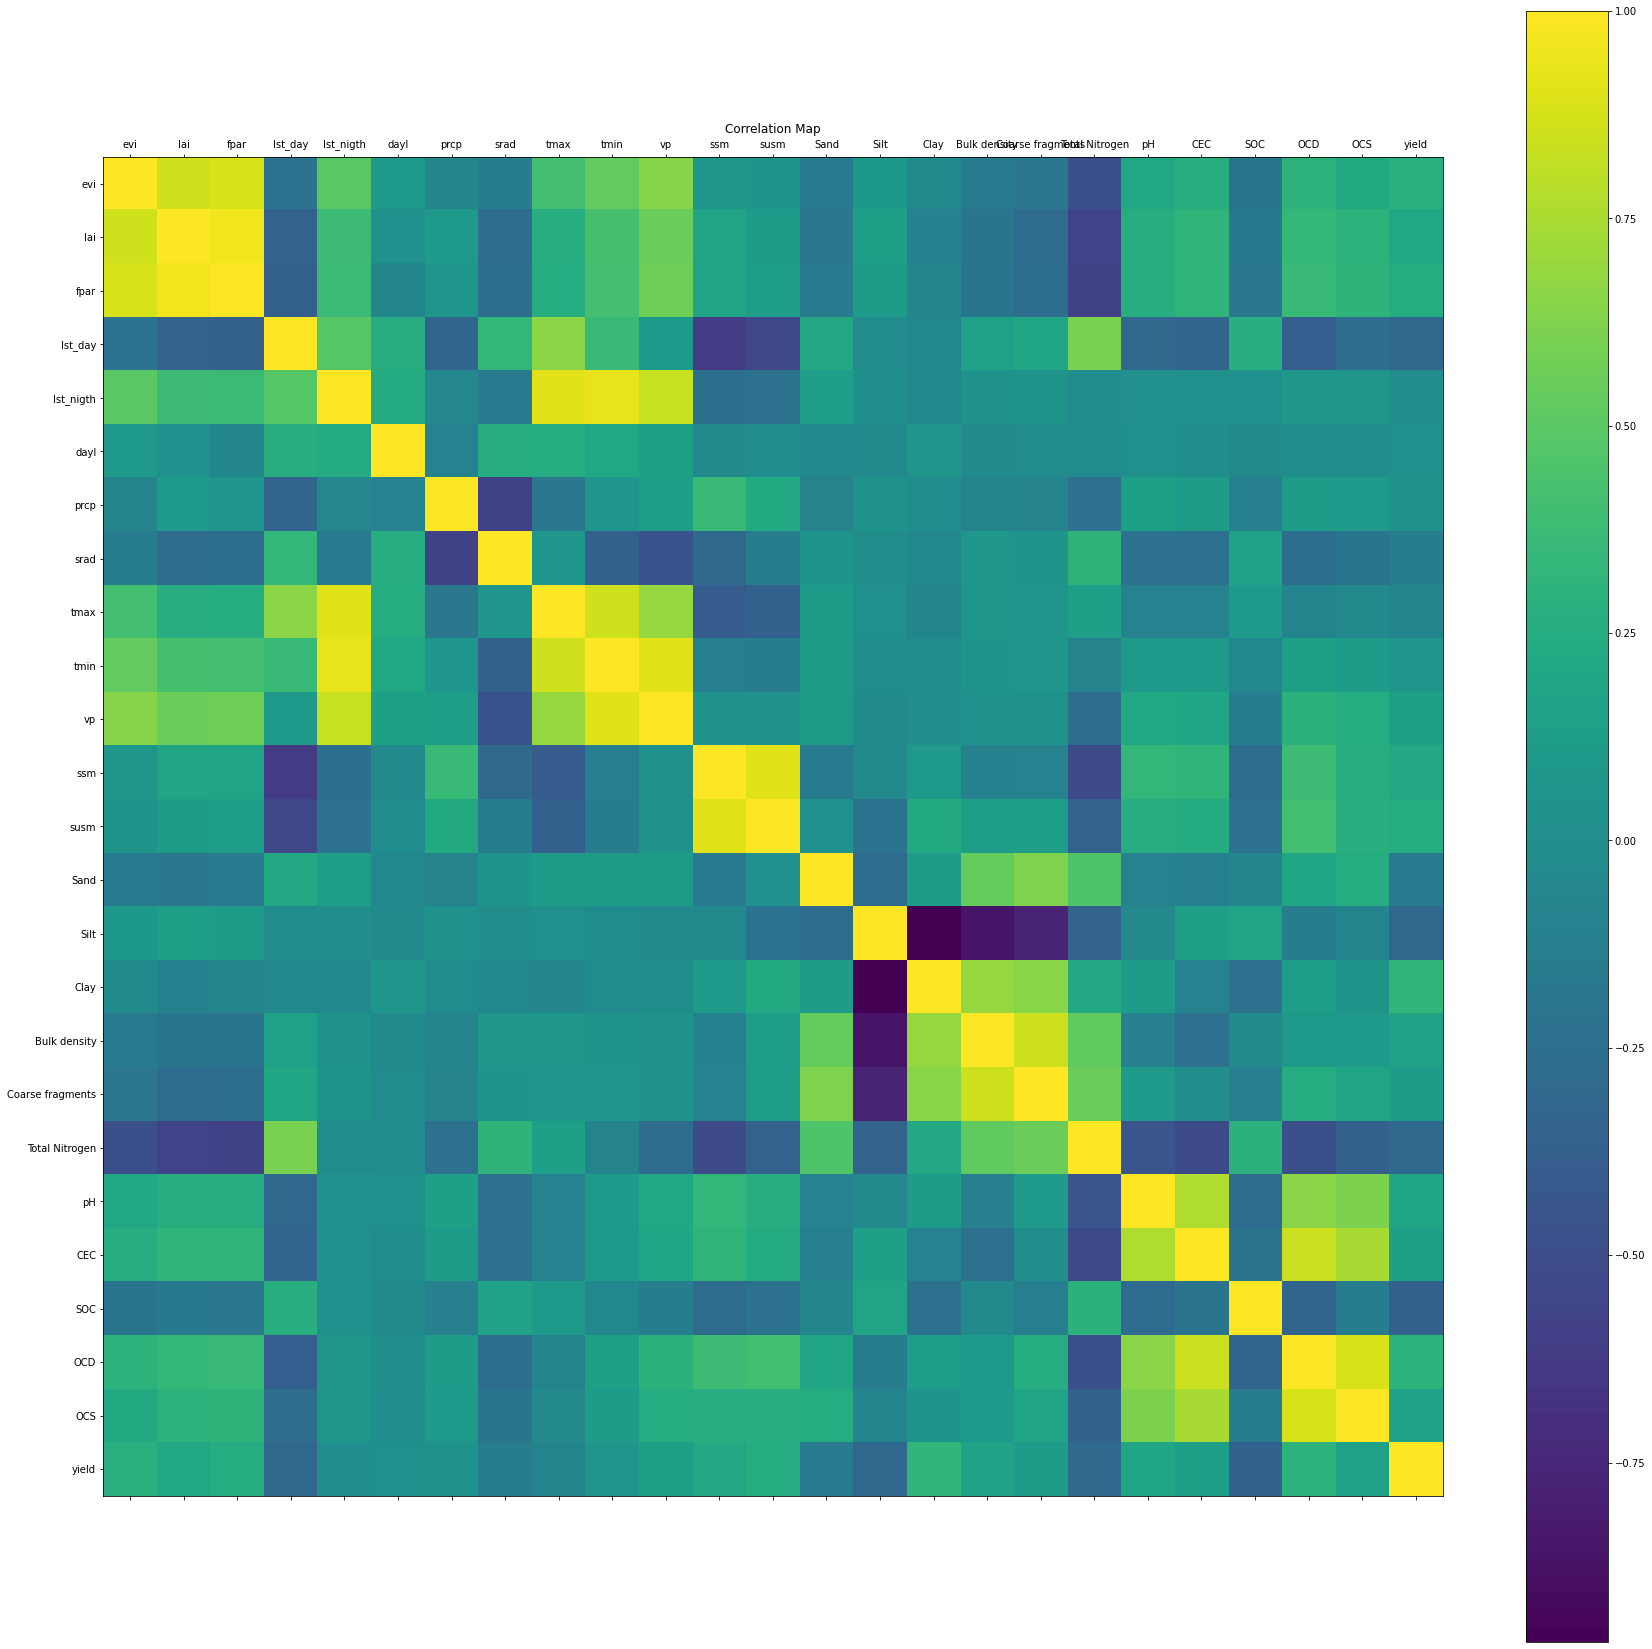

In [38]:
plt_corr(full_df.iloc[:, 1:],size=(30,30),save_fig=True, save_path= "results/corr_map.png")